## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from faker import Faker
import random
np.random.seed()
import warnings
warnings.filterwarnings("ignore")

## Create Dataset

In [2]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)


In [3]:
print(len(palindromes))
palindromes

32


array(['0000000000', '0000110000', '0001001000', '0001111000',
       '0010000100', '0010110100', '0011001100', '0011111100',
       '0100000010', '0100110010', '0101001010', '0101111010',
       '0110000110', '0110110110', '0111001110', '0111111110',
       '1000000001', '1000110001', '1001001001', '1001111001',
       '1010000101', '1010110101', '1011001101', '1011111101',
       '1100000011', '1100110011', '1101001011', '1101111011',
       '1110000111', '1110110111', '1111001111', '1111111111'],
      dtype='<U10')

In [4]:
np.random.shuffle(palindromes)
print(len(palindromes))
palindromes

32


array(['0111001110', '0001001000', '0100000010', '1101001011',
       '1000000001', '1111001111', '1001111001', '1001001001',
       '1010000101', '0101001010', '1100000011', '1100110011',
       '1110000111', '0011111100', '1110110111', '1011001101',
       '1011111101', '1010110101', '0000110000', '1000110001',
       '0000000000', '1101111011', '0100110010', '0110110110',
       '0010000100', '1111111111', '0101111010', '0111111110',
       '0011001100', '0001111000', '0110000110', '0010110100'],
      dtype='<U10')

In [5]:
# for i in range(5):
#     x = np.concatenate((x, palindromes))
print(len(x))

1024


In [6]:
y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [8]:
# a = np.array([1, 2, -3])
# b = np.array([2, 3, 4])
# a*b

# With Batches

In [9]:
np.random.seed(30)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1

weights_ih = np.load('weights/weights_ih2.npy')
# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ho = np.random.rand(hidden_layer_size, output_size)
bias_ih = np.load('weights/bias_ih2.npy')
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ho = np.random.rand(1, output_size)

In [10]:
min_loss = 500

In [11]:
# weights_ih = np.load('weights_ih2.npy')
# weights_ho = np.load('weights_ho2.npy')
# bias_ih = np.load('bias_ih2.npy')
# bias_ho = np.load('bias_ho2.npy')
# weights_ih = weights_ih[:, [1, 3]]
# bias_ih = bias_ih[:, [1, 3]]

Epoch 0 : loss [21.72319047]
Epoch 1 : loss [12.65511803]


Epoch 2 : loss [12.49180084]
Epoch 3 : loss [12.4323052]
Epoch 4 : loss [12.40040131]
Epoch 5 : loss [12.37925625]
Epoch 6 : loss [12.36309877]
Epoch 7 : loss [12.34943684]
Epoch 8 : loss [12.33701959]
Epoch 9 : loss [12.32514556]
Epoch 10 : loss [12.31338535]
Epoch 11 : loss [12.30145671]
Epoch 12 : loss [12.28916357]
Epoch 13 : loss [12.27636446]
Epoch 14 : loss [12.26295561]
Epoch 15 : loss [12.24886138]
Epoch 16 : loss [12.23402844]
Epoch 17 : loss [12.21842116]
Epoch 18 : loss [12.20201665]
Epoch 19 : loss [12.18479853]
Epoch 20 : loss [12.1667486]
Epoch 21 : loss [12.14783656]
Epoch 22 : loss [12.12800826]
Epoch 23 : loss [12.10717342]
Epoch 24 : loss [12.08519394]
Epoch 25 : loss [12.06187343]
Epoch 26 : loss [12.03694821]
Epoch 27 : loss [12.01007912]
Epoch 28 : loss [11.98084273]
Epoch 29 : loss [11.94872055]
Epoch 30 : loss [11.9130841]
Epoch 31 : loss [11.87317447]
Epoch 32 : loss [11.82807441]
Epoch 33 : loss [11.7766722]
Epoch 34 : loss [11.71761661]
Epoch 35 : loss [11.64

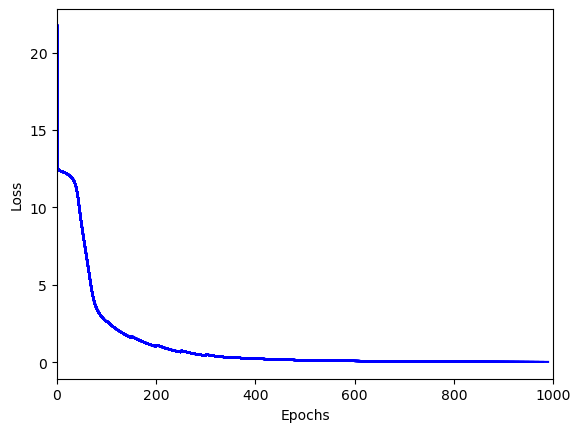

In [12]:
LEARNING_RATE = 1
NUM_EPOCHS = 1000
BATCH_SIZE = 4
cost = []
initial_lr = LEARNING_RATE
lr_schedule = lambda epoch: initial_lr * 1.15 ** (epoch // 50)

for epoch in range(NUM_EPOCHS):
    tot_loss = 0
    
    current_lr = lr_schedule(epoch)

    for batch_start in range(0, len(x_train), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        batch_gradients_ih = np.zeros_like(weights_ih)
        batch_gradients_ho = np.zeros_like(weights_ho)
        batch_bias_ih = np.zeros_like(bias_ih)
        batch_bias_ho = np.zeros_like(bias_ho)

        for i, s in enumerate(x_batch):
            inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

            hlayer_logits = np.dot(inp, weights_ih) + bias_ih
            hlayer_output = sigmoid(hlayer_logits)

            final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
            final_output = sigmoid(final_logits)

            tot_loss += 0.5 * (abs(final_output[0] - y_batch[i])) ** 2

            output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
            batch_bias_ho += output_delta
            batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
            batch_gradients_ho += hlayer_output.T.dot(output_delta)
            batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        # Update weights and biases after the batch
        bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
        bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
        weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
        weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)

    cost.append(tot_loss)
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch % 10 == 0:
        plt.plot([pl for pl in range(epoch + 1)], cost, 'b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        # plt.ylim(0, 5)
        plt.xlim(0, NUM_EPOCHS)
        plt.savefig('train.png')
        # if tot_loss < min_loss:       # IMP: Don't save weights
        #     np.save('weights_ih2.npy', weights_ih)
        #     np.save('weights_ho2.npy', weights_ho)
        #     np.save('bias_ih2', bias_ih)
        #     np.save("bias_ho2", bias_ho)
        #     min_loss = tot_loss


In [14]:
np.random.seed(30)
LEARNING_RATE = 1e-3
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1

weights_ih = np.load('weights/weights_ih2.npy')
# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ho = np.random.rand(hidden_layer_size, output_size)
bias_ih = np.load('weights/bias_ih2.npy')
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ho = np.random.rand(1, output_size)

Epoch 0 : loss 231.46591106076139
Epoch 1 : loss 135.2913453110362
Epoch 2 : loss 131.10783620180757
Epoch 3 : loss 127.97817646162584
Epoch 4 : loss 125.353968954109
Epoch 5 : loss 123.08965461425181
Epoch 6 : loss 120.95664649421313
Epoch 7 : loss 118.71990372439548
Epoch 8 : loss 116.21342868152254
Epoch 9 : loss 113.36773592843284
Epoch 10 : loss 110.19812783992037
Epoch 11 : loss 106.77441107660005
Epoch 12 : loss 103.19031086700136
Epoch 13 : loss 99.54183257036402
Epoch 14 : loss 95.91533564592285
Epoch 15 : loss 92.38230561140088
Epoch 16 : loss 88.99775989365253
Epoch 17 : loss 85.80042985893974
Epoch 18 : loss 82.81389576726343
Epoch 19 : loss 80.04837436142033
Epoch 20 : loss 77.50299673446384
Epoch 21 : loss 75.16837736956128
Epoch 22 : loss 73.02922154963284
Epoch 23 : loss 71.06672249863755
Epoch 24 : loss 69.26056631293415
Epoch 25 : loss 67.5904592891074
Epoch 26 : loss 66.03718173912793
Epoch 27 : loss 64.58323270746706
Epoch 28 : loss 63.213156841272685
Epoch 29 : los

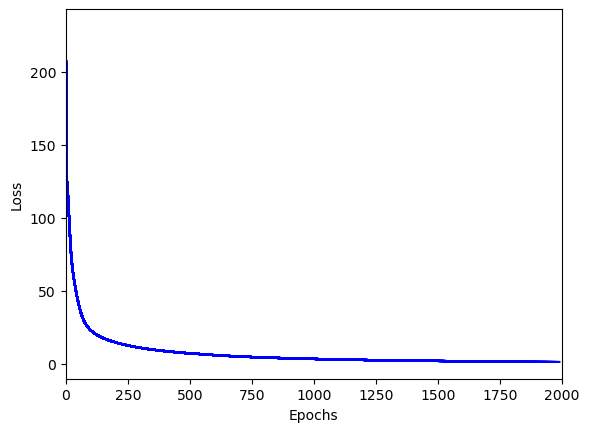

In [15]:
LEARNING_RATE = 0.1
NUM_EPOCHS = 2000
BATCH_SIZE = 4
cost = []
initial_lr = LEARNING_RATE
lr_schedule = lambda epoch: initial_lr * 1.15 ** (epoch // 500)

for epoch in range(NUM_EPOCHS):
    tot_loss = 0

    current_lr = lr_schedule(epoch)

    for batch_start in range(0, len(x_train), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = x_train[batch_start:batch_end]
        y_batch = y_train[batch_start:batch_end]

        batch_gradients_ih = np.zeros_like(weights_ih)
        batch_gradients_ho = np.zeros_like(weights_ho)
        batch_bias_ih = np.zeros_like(bias_ih)
        batch_bias_ho = np.zeros_like(bias_ho)

        for i, s in enumerate(x_batch):
            inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

            hlayer_logits = np.dot(inp, weights_ih) + bias_ih
            hlayer_output = sigmoid(hlayer_logits)

            final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
            final_output = sigmoid(final_logits)

            tot_loss += cross_entropy_loss(y_batch[i], final_output[0])

            output_delta = final_output - y_batch[i]
            batch_bias_ho += output_delta
            batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
            batch_gradients_ho += hlayer_output.T.dot(output_delta)
            batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

        # Update weights and biases after the batch
        bias_ho -= current_lr * (batch_bias_ho / BATCH_SIZE)
        bias_ih -= current_lr * (batch_bias_ih / BATCH_SIZE)
        weights_ho -= current_lr * (batch_gradients_ho / BATCH_SIZE)
        weights_ih -= current_lr * (batch_gradients_ih / BATCH_SIZE)

    cost.append(tot_loss)
    print(f'Epoch {epoch} : loss {tot_loss}')
    if epoch % 10 == 0:
        plt.plot([pl for pl in range(epoch + 1)], cost, 'b')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.xlim(0, NUM_EPOCHS)
        plt.savefig('train_CE.png')

In [16]:
weights_ih

array([[-15.45913752,  14.92224497],
       [-35.28766024,  34.17323302],
       [  8.63230372,  -8.45759882],
       [-17.76047003,  17.12441411],
       [-13.18540573,  12.74880854],
       [ 13.16683514, -12.76282041],
       [ 17.67452869, -17.08718106],
       [ -8.70593039,   8.48548438],
       [ 35.27278052, -34.17116952],
       [ 15.4698531 , -14.92536164]])

# Testing

In [17]:
print('\nweights_ih: \n', weights_ih)
print('\nbias_ih: \n', bias_ih)
print('weights_ho: \n', weights_ho)
print('\nbias_ho: \n', bias_ho)


weights_ih: 
 [[-15.45913752  14.92224497]
 [-35.28766024  34.17323302]
 [  8.63230372  -8.45759882]
 [-17.76047003  17.12441411]
 [-13.18540573  12.74880854]
 [ 13.16683514 -12.76282041]
 [ 17.67452869 -17.08718106]
 [ -8.70593039   8.48548438]
 [ 35.27278052 -34.17116952]
 [ 15.4698531  -14.92536164]]

bias_ih: 
 [[-1.76269353 -1.80276022]]
weights_ho: 
 [[-24.31541727]
 [-24.80247451]]

bias_ho: 
 [[10.73350802]]


In [19]:
x_test1 = '1010110101'
x_test2 = '1000011111'
def test(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    print('-'*25, '\nInput: \n', inp)
    print('\nLogit 1: \n', np.dot(inp, weights_ih)+ bias_ih)
    print('\nHidden layer 1 Output: \n', sigmoid(np.dot(inp, weights_ih)+ bias_ih))
    print('\nLogit 2: \n', np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)
    print('\nHidded layer 2 Output: \n', sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

if(test(x_test1)>0.5):
    print("\nPalindrome")
else:
    print("\nNot Palindrome!")


# if(test(x_test2)>0.5):
#     print("\nPalindrome")
# else:
#     print("\nNot Palindrome!")

------------------------- 
Input: 
 [[1 0 1 0 1 1 0 1 0 1]]

Logit 1: 
 [[-1.8441752  -1.79200321]]

Hidden layer 1 Output: 
 [[0.13655825 0.1428273 ]]

Logit 2: 
 [[3.87056681]]

Hidded layer 2 Output: 
 [[0.97957915]]

Palindrome


In [20]:
np.save('new_weights/weights_ih2.npy', weights_ih)
np.save('new_weights/weights_ho2.npy', weights_ho)
np.save('new_weights/bias_ih2', bias_ih)
np.save("new_weights/bias_ho2", bias_ho)
# weights_ih = np.load('weights_ih2.npy')
# weights_ho = np.load('weights_ho2.npy')
# bias_ih = np.load('bias_ih2.npy')
# bias_ho = np.load('bias_ho2.npy')
print(weights_ih)

[[-15.45913752  14.92224497]
 [-35.28766024  34.17323302]
 [  8.63230372  -8.45759882]
 [-17.76047003  17.12441411]
 [-13.18540573  12.74880854]
 [ 13.16683514 -12.76282041]
 [ 17.67452869 -17.08718106]
 [ -8.70593039   8.48548438]
 [ 35.27278052 -34.17116952]
 [ 15.4698531  -14.92536164]]


## New Testing

In [21]:
count=0
for i in range(len(x_test)):
    y_p = 1 if test(x_test[i])>0.5 else 0
    if y_test[i]!=y_p:
        count+=1
        print(x_test[i], ' - predicted: ', y_p, ' with prob: ', test(x_test[i]))
print('-------------------------------- Accuracy: ', (len(x_test) - count)/len(x_test), '--------------------------------')

------------------------- 
Input: 
 [[1 1 0 1 1 1 0 0 0 0]]

Logit 1: 
 [[-70.28853191  64.40312001]]

Hidden layer 1 Output: 
 [[2.97905451e-31 1.00000000e+00]]

Logit 2: 
 [[-14.06896648]]

Hidded layer 2 Output: 
 [[7.76113349e-07]]
------------------------- 
Input: 
 [[0 0 1 0 0 0 0 0 1 0]]

Logit 1: 
 [[ 42.14239071 -44.43152856]]

Hidden layer 1 Output: 
 [[1.00000000e+00 5.05396611e-20]]

Logit 2: 
 [[-13.58190925]]

Hidded layer 2 Output: 
 [[1.26313919e-06]]
------------------------- 
Input: 
 [[0 0 1 0 0 0 1 0 1 0]]

Logit 1: 
 [[ 59.8169194  -61.51870962]]

Hidden layer 1 Output: 
 [[1.00000000e+00 1.91762586e-27]]

Logit 2: 
 [[-13.58190925]]

Hidded layer 2 Output: 
 [[1.26313919e-06]]
------------------------- 
Input: 
 [[0 0 1 1 0 0 0 0 1 1]]

Logit 1: 
 [[ 39.85177378 -42.23247609]]

Hidden layer 1 Output: 
 [[1.00000000e+00 4.55689136e-19]]

Logit 2: 
 [[-13.58190925]]

Hidded layer 2 Output: 
 [[1.26313919e-06]]
------------------------- 
Input: 
 [[1 0 1 0 0 1 1 0 1 

## K-Fold Cross Validation

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def relu(x):
    return np.maximum(0, x)

In [23]:
x = []
palindromes = []
for i in range(1024):
    binary_string = format(i, '010b')
    x.append(binary_string)
    if binary_string == binary_string[::-1]:
        palindromes.append(binary_string)
x = np.array(x)
palindromes = np.array(palindromes)

y = []
for binary_string in x:
    y.append(binary_string == binary_string[::-1])
y = np.array(y)
permutation_index = np.random.permutation(len(x))
x = x[permutation_index]
y = y[permutation_index]

In [24]:
np.random.seed(28)
LEARNING_RATE = 0.1
NUM_EPOCHS = 10000

input_size = 10
hidden_layer_size = 2
output_size = 1
global weights_ih

# weights_ih = np.random.rand(input_size, hidden_layer_size)
weights_ih = np.load('weights/weights_ih2.npy')
weights_ho = np.random.rand(hidden_layer_size, output_size)
# bias_ih = np.random.rand(1, hidden_layer_size)
bias_ih = np.load('weights/bias_ih2.npy')
bias_ho = np.random.rand(1, output_size)

In [25]:
def accuracy_metric(predicted, target):
    if len(target)!=len(predicted):
        raise ValueError("Both predicted and target vectors should be same size!")

    correct = 0
    for i in range(len(target)):
        if target[i] == predicted[i]:
            correct += 1
    return correct / float(len(target)) * 100.0

In [26]:
def train(x_train,y_train, x_val, y_val, lr=1, epochs=1000, batch_size=4):
    global weights_ih, weights_ho, bias_ih, bias_ho
    LEARNING_RATE = lr
    NUM_EPOCHS = epochs
    BATCH_SIZE = batch_size  # Set your desired batch size
    cost = []
    cost_val = []
    initial_lr = LEARNING_RATE
    lr_schedule = lambda epoch: initial_lr * 0.95 ** (epoch // 50)

    for epoch in range(NUM_EPOCHS):
        tot_loss = 0
        tot_loss_valid = 0
        current_lr = lr_schedule(epoch)

        for batch_start in range(0, len(x_train), BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            x_batch = x_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]

            batch_gradients_ih = np.zeros_like(weights_ih)
            batch_gradients_ho = np.zeros_like(weights_ho)
            batch_bias_ih = np.zeros_like(bias_ih)
            batch_bias_ho = np.zeros_like(bias_ho)

            for i, s in enumerate(x_batch):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss += abs(final_output[0] - y_batch[i])

                output_delta = (y_batch[i] - final_output[0]) * final_output * (1 - final_output[0])
                batch_bias_ho += output_delta
                batch_bias_ih += (output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))
                batch_gradients_ho += hlayer_output.T.dot(output_delta)
                batch_gradients_ih += inp.T.dot(output_delta.dot(weights_ho.T) * hlayer_output * (1 - hlayer_output))

            # Update weights and biases after the batch
            bias_ho += current_lr * (batch_bias_ho / BATCH_SIZE)
            bias_ih += current_lr * (batch_bias_ih / BATCH_SIZE)
            weights_ho += current_lr * (batch_gradients_ho / BATCH_SIZE)
            weights_ih += current_lr * (batch_gradients_ih / BATCH_SIZE)
        
        cost.append(tot_loss)
        # print(f'Epoch {epoch} : loss {tot_loss}')
        for i, s in enumerate(x_val):
                inp = np.reshape(np.array([int(char) for char in s]), (1, input_size))

                hlayer_logits = np.dot(inp, weights_ih) + bias_ih
                hlayer_output = sigmoid(hlayer_logits)

                final_logits = np.dot(hlayer_output, weights_ho) + bias_ho
                final_output = sigmoid(final_logits)

                tot_loss_valid += abs(final_output[0] - y_val[i])
    cost_val.append(tot_loss_valid)
    print("Done!")
    return cost, cost_val

In [27]:
def k_fold_cross_validation(X:np.ndarray, y:np.ndarray, k_folds:int = 4, epochs_per_fold:int = 250):
        fold_size = len(X) // k_folds
        losses = []
        losses_val = []
        for i in range(k_folds):
            start, end = i * fold_size, (i + 1) * fold_size
            X_test_fold, y_test_fold = X[start:end], y[start:end]
            X_train_fold = np.concatenate([X[:start], X[end:]])
            y_train_fold = np.concatenate([y[:start], y[end:]])
            print(f"Training Fold {i+1}\n")
            loss_train, loss_val = train(X_train_fold, y_train_fold, X_test_fold, y_test_fold, epochs=epochs_per_fold)
            losses.extend(loss_train)
            losses_val.extend(loss_val)
            print("\n"+10*"----"+"\n")

        return losses, losses_val

In [28]:
losses, loss_val = k_fold_cross_validation(x, y, epochs_per_fold = 100)

Training Fold 1

Done!

----------------------------------------

Training Fold 2

Done!

----------------------------------------

Training Fold 3

Done!

----------------------------------------

Training Fold 4

Done!

----------------------------------------



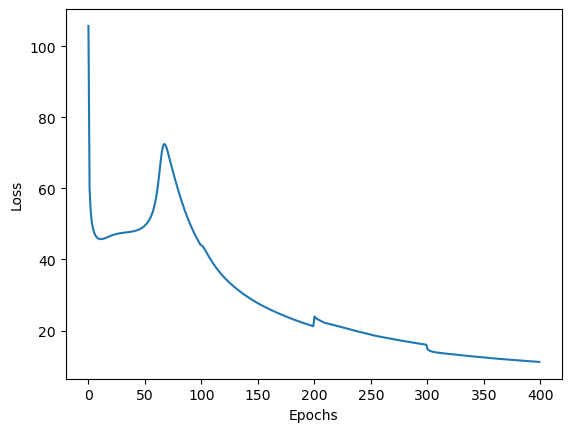

In [29]:
plt.plot( np.arange(0, len(losses)),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

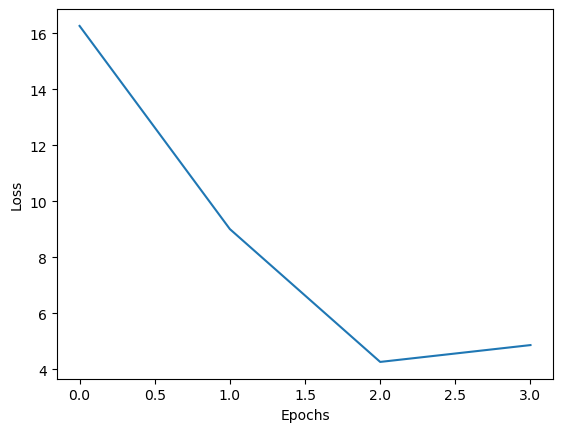

In [30]:
plt.plot( np.arange(0, len(loss_val)),loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
def predict(x):
    inp = np.reshape(np.array([int(char) for char in x]), (1, input_size))
    return sigmoid(np.dot(sigmoid(np.dot(inp, weights_ih)+ bias_ih), weights_ho)+bias_ho)

In [32]:
count=0
for i in range(len(x)):
    y_p = 1 if predict(x[i])>0.5 else 0
    if y[i]!=y_p:
        count+=1
        print(x[i], ' - predicted: ', y_p)
print('Accuracy: ', (len(x) - count)/len(x))

Accuracy:  1.0
